# NAME : SARATH KRISHNA
# ROLL.NO : CB.EN.U4CSE20256
assignment 4

In [81]:


import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



#PART A :-Data Manipulation-Pandas
#QUESTION 1 (Recipe data)

In [194]:
path = '/content/drive/MyDrive/Colab Notebooks/data science/assignment4/recipeitems-latest.json'

In [195]:
df = pd.read_json(path, lines=True)
df

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173273,{'$oid': '551c030e96cc6233c0d0dc3d'},The Easiest Homemade Vanilla Ice Cream,250 milliliters Cream\n395 grams Canned Sweete...,http://tastykitchen.com/recipes/desserts/the-e...,http://tastykitchen.com/recipes/wp-content/upl...,{'$date': 1427899150211},PT,tastykitchen,10,2015-04-01,PT10M,The easiest vanilla ice cream you will ever ma...,NaN,NaN,NaN,NaN,NaN
173274,{'$oid': '551c030f96cc6233c0d0dc3e'},Butterfinger Eggs with Vanilla,2 cups Candy Corn\n1 teaspoon Vanilla Extract\...,http://tastykitchen.com/recipes/holidays/butte...,http://tastykitchen.com/recipes/wp-content/upl...,{'$date': 1427899151232},PT5M,tastykitchen,24,2015-04-01,PT8H,Chocolate coated peanut butter eggs with a hin...,NaN,NaN,NaN,NaN,NaN
173275,{'$oid': '551c86b796cc626b1ab4d901'},The Best Homemade Taco Seasoning,1/4 cup ground cumin\n1/4 cup kosher salt\n2 t...,http://picky-palate.com/2015/04/01/the-best-ho...,http://picky-palate.com/wp-content/uploads/201...,{'$date': 1427932855918},NaN,pickypalate,Makes about 1 cup,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173276,{'$oid': '551f29b696cc62227991d465'},The Ultimate Queso Bean Dip,Two 16 ounce cans Old El Paso Refried Beans\n4...,http://picky-palate.com/2015/04/03/the-ultimat...,http://picky-palate.com/wp-content/uploads/201...,{'$date': 1428105654508},NaN,pickypalate,8-10 Servings,2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


indexing

In [196]:
df["name"][4]

'Pomegranate Yogurt Bowl'

In [197]:
df["name"][1:10]

1                            Hot Roast Beef Sandwiches
2                   Morrocan Carrot and Chickpea Salad
3                                Mixed Berry Shortcake
4                              Pomegranate Yogurt Bowl
5                                   Krispy Easter Eggs
6    Spinach and Kamut Salad with Chili-Orange Dres...
7                             Eggs in Hash Brown Nests
8                                              Za'atar
9                     Pistachio Chocolate Chip Muffins
Name: name, dtype: object

In [198]:
df[12:100]

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
12,{'$oid': '5160757a96cc6207b12d18da'},No-Bake Chocolate Bottom Pumpkin Tart,Tart Dough:\n1 cup all-purpose flour\n1/8 tsp ...,http://delishhh.com/2012/11/26/chocolate-botto...,http://delishhh.com/wp-content/uploads/2012/11...,{'$date': 1365276026276},PT30M,delishhh,8 servings,2012-11-26T12:00:18+00:00,PT2H,A few weeks ago i wanted to make new pumpkin d...,NaN,NaN,NaN,2013-03-24T04:41:42+00:00,NaN
13,{'$oid': '5160757b96cc6207a37ff77a'},Seeded Popovers,2 cups / 475 ml whole milk\n2 tablespoons unsa...,http://www.101cookbooks.com/archives/seeded-po...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276027392},PT50M,101cookbooks,"Makes 6-8 large popovers, or more smaller ones..",2013-02-04,PT65M,Popovers are the most delightful thing my oven...,NaN,NaN,NaN,NaN,NaN
14,{'$oid': '5160757b96cc6207aada3231'},Spinach and Black Bean Quesadilla,2 8-10″ tortillas (I used sprouted grain torti...,http://naturallyella.com/2013/03/22/spinach-an...,http://cdn.naturallyella.com/files/2013/03/IMG...,{'$date': 1365276027075},PT10M,naturallyella,2,2013-03-22T09:03:10+00:00,PT5M,My daily schedule is somewhat odd. I've been p...,PT15M,Erin Alderson,NaN,NaN,NaN
15,{'$oid': '5160757c96cc62079cc2db1c'},Easter Leftover Sandwich,12 whole Hard Boiled Eggs\n1/2 cup Mayonnaise\...,http://thepioneerwoman.com/cooking/2013/04/eas...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276028411},PT,thepioneerwoman,8,2013-04-01,PT15M,Got leftover Easter eggs? Got leftover East...,NaN,NaN,NaN,NaN,NaN
16,{'$oid': '5160757d96cc6207a37ff77b'},Kale Rice Bowl,olive oil or clarified butter\n1 bunch of kale...,http://www.101cookbooks.com/archives/kale-rice...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276029884},PT5M,101cookbooks,Serves 2-3.,2013-02-11,PT5M,"A quick lunchtime brown rice bowl with kale, c...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,{'$oid': '5160761496cc6208c1793433'},Tomato fondue,24 tomatoes \n3 medium onions\n4 cloves garlic...,http://www.bbc.co.uk/food/recipes/tomatofondue...,NaN,{'$date': 1365276180145},NaN,bbcfood,Serves 4,NaN,PT30M,NaN,NaN,NaN,NaN,NaN,NaN
96,{'$oid': '5160761596cc6208ac7c9d4e'},Chocolate Bark Recipe for Valentines Day,14 oz. red candy melts\n1 cup pink candy melts...,http://www.aspicyperspective.com/2013/02/choco...,http://www.aspicyperspective.com/wp-content/up...,{'$date': 1365276181883},PT8M,aspicyperspective,15 servings,NaN,PT20M,NaN,NaN,NaN,NaN,NaN,NaN
97,{'$oid': '5160761596cc6208c1793434'},Strawberry jalousie with strawberries romanoff,75ml/3fl oz double cream\n75ml/3fl oz milk\n2 ...,http://www.bbc.co.uk/food/recipes/strawberryja...,NaN,{'$date': 1365276181908},PT30M,bbcfood,Serves 4,NaN,PT30M,NaN,NaN,NaN,NaN,NaN,NaN
98,{'$oid': '5160761696cc6208b3300143'},Spicy Spinach-Stuffed Mushrooms,"24 ounces, weight White Mushrooms\n1 Tablespoo...",http://thepioneerwoman.com/cooking/2012/02/spi...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276182904},PT25M,thepioneerwoman,8,2012-02-06,PT10M,Garsh. Were these good. I made them last night...,NaN,NaN,NaN,NaN,NaN


 Missing Value Manipulation

In [199]:
df.fillna(method='bfill')

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",PT1H15M,Erin Alderson,Salad,2013-03-24T04:41:42+00:00,[Roughly chop the bacon and dried cranberries ...
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",PT1H15M,Erin Alderson,Salad,2013-03-24T04:41:42+00:00,[Roughly chop the bacon and dried cranberries ...
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},PT15M,101cookbooks,8,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,PT1H15M,Erin Alderson,Salad,2013-03-24T04:41:42+00:00,[Roughly chop the bacon and dried cranberries ...
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,PT1H15M,Erin Alderson,Salad,2013-03-24T04:41:42+00:00,[Roughly chop the bacon and dried cranberries ...
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},PT5M,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,PT1H15M,Erin Alderson,Salad,2013-03-24T04:41:42+00:00,[Roughly chop the bacon and dried cranberries ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173273,{'$oid': '551c030e96cc6233c0d0dc3d'},The Easiest Homemade Vanilla Ice Cream,250 milliliters Cream\n395 grams Canned Sweete...,http://tastykitchen.com/recipes/desserts/the-e...,http://tastykitchen.com/recipes/wp-content/upl...,{'$date': 1427899150211},PT,tastykitchen,10,2015-04-01,PT10M,The easiest vanilla ice cream you will ever ma...,NaN,NaN,NaN,NaN,NaN
173274,{'$oid': '551c030f96cc6233c0d0dc3e'},Butterfinger Eggs with Vanilla,2 cups Candy Corn\n1 teaspoon Vanilla Extract\...,http://tastykitchen.com/recipes/holidays/butte...,http://tastykitchen.com/recipes/wp-content/upl...,{'$date': 1427899151232},PT5M,tastykitchen,24,2015-04-01,PT8H,Chocolate coated peanut butter eggs with a hin...,NaN,NaN,NaN,NaN,NaN
173275,{'$oid': '551c86b796cc626b1ab4d901'},The Best Homemade Taco Seasoning,1/4 cup ground cumin\n1/4 cup kosher salt\n2 t...,http://picky-palate.com/2015/04/01/the-best-ho...,http://picky-palate.com/wp-content/uploads/201...,{'$date': 1427932855918},PT25M,pickypalate,Makes about 1 cup,2015-04-01,PT10M,"These whole wheat, maple-sweetened banana muff...",NaN,NaN,NaN,NaN,NaN
173276,{'$oid': '551f29b696cc62227991d465'},The Ultimate Queso Bean Dip,Two 16 ounce cans Old El Paso Refried Beans\n4...,http://picky-palate.com/2015/04/03/the-ultimat...,http://picky-palate.com/wp-content/uploads/201...,{'$date': 1428105654508},PT25M,pickypalate,8-10 Servings,2015-04-03,PT10M,"These whole wheat, maple-sweetened banana muff...",NaN,NaN,NaN,NaN,NaN


Concatenation

In [200]:
temp_df1 = df[0:len(df)//2]
temp_df2 = df[len(df)//2:len(df)]
temp_df = pd.concat([temp_df1, temp_df2])
temp_df

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173273,{'$oid': '551c030e96cc6233c0d0dc3d'},The Easiest Homemade Vanilla Ice Cream,250 milliliters Cream\n395 grams Canned Sweete...,http://tastykitchen.com/recipes/desserts/the-e...,http://tastykitchen.com/recipes/wp-content/upl...,{'$date': 1427899150211},PT,tastykitchen,10,2015-04-01,PT10M,The easiest vanilla ice cream you will ever ma...,NaN,NaN,NaN,NaN,NaN
173274,{'$oid': '551c030f96cc6233c0d0dc3e'},Butterfinger Eggs with Vanilla,2 cups Candy Corn\n1 teaspoon Vanilla Extract\...,http://tastykitchen.com/recipes/holidays/butte...,http://tastykitchen.com/recipes/wp-content/upl...,{'$date': 1427899151232},PT5M,tastykitchen,24,2015-04-01,PT8H,Chocolate coated peanut butter eggs with a hin...,NaN,NaN,NaN,NaN,NaN
173275,{'$oid': '551c86b796cc626b1ab4d901'},The Best Homemade Taco Seasoning,1/4 cup ground cumin\n1/4 cup kosher salt\n2 t...,http://picky-palate.com/2015/04/01/the-best-ho...,http://picky-palate.com/wp-content/uploads/201...,{'$date': 1427932855918},NaN,pickypalate,Makes about 1 cup,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173276,{'$oid': '551f29b696cc62227991d465'},The Ultimate Queso Bean Dip,Two 16 ounce cans Old El Paso Refried Beans\n4...,http://picky-palate.com/2015/04/03/the-ultimat...,http://picky-palate.com/wp-content/uploads/201...,{'$date': 1428105654508},NaN,pickypalate,8-10 Servings,2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Append

In [201]:
temp_df1.append(temp_df2)
temp_df1

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5160757096cc62079cc2db17'},Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276016700},PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5160757496cc6207a37ff778'},Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276020318},NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86634,{'$oid': '516b451396cc6251ae131965'},Chocolate Calypso Beans (remix),1 lb. Jacob's Cattle beans\n2 T. olive oil\n1 ...,http://www.101cookbooks.com/archives/000116.html,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365984531639},None,101cookbooks,None,2004-09-06,None,101 Cookbooks: Chocolate Calypso Beans Recipe,NaN,NaN,NaN,NaN,NaN
86635,{'$oid': '516b451496cc6251ae131966'},Apple Pie Recipe,3 tablespoons all-purpose flour\n1 teaspoon fi...,http://www.101cookbooks.com/archives/000122.html,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365984532919},None,101cookbooks,Serves 6 to 8\nActive time: 40 minutes\nStart ...,2004-10-20,None,101 Cookbooks: Apple Pie Recipe,NaN,NaN,NaN,NaN,NaN
86636,{'$oid': '516b451596cc6251ae131967'},Graham Cracker Recipe,2 1/2 cups plus 2 tablespoons unbleached pastr...,http://www.101cookbooks.com/archives/000126.html,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365984533018},None,101cookbooks,None,2004-11-10,None,Nancy Silverton's graham cracker recipe - flaw...,NaN,NaN,NaN,NaN,NaN
86637,{'$oid': '516b451596cc6251ae131968'},Green Curry with Tofu,Ingredients for chili paste:\n2 green hot chil...,http://www.101cookbooks.com/archives/000130.html,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365984533629},None,101cookbooks,None,2004-12-01,None,101 Cookbooks: Green Curry with Tofu Recipe,NaN,NaN,NaN,NaN,NaN


Merge and Join

In [202]:
temp_df1 = df[[ "name", "ingredients"]]
temp_df2 = df[["name", "url", "image"]]
temp_df = pd.merge(temp_df1, temp_df2)
temp_df

,name,ingredients,url,image
0,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...
1,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://tastykitchen.com/recipes/breakfastbrunc...,http://static.tastykitchen.com/recipes/files/2...
2,Drop Biscuits and Sausage Gravy,3 cups 3 cups\n2 Tablespoons 2 Tablespoons\n½ ...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...
3,Drop Biscuits and Sausage Gravy,3 cups 3 cups\n2 Tablespoons 2 Tablespoons\n½ ...,http://tastykitchen.com/recipes/breakfastbrunc...,http://static.tastykitchen.com/recipes/files/2...
4,Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...
...,...,...,...,...
277887,The Easiest Homemade Vanilla Ice Cream,250 milliliters Cream\n395 grams Canned Sweete...,http://tastykitchen.com/recipes/desserts/the-e...,http://tastykitchen.com/recipes/wp-content/upl...
277888,Butterfinger Eggs with Vanilla,2 cups Candy Corn\n1 teaspoon Vanilla Extract\...,http://tastykitchen.com/recipes/holidays/butte...,http://tastykitchen.com/recipes/wp-content/upl...
277889,The Best Homemade Taco Seasoning,1/4 cup ground cumin\n1/4 cup kosher salt\n2 t...,http://picky-palate.com/2015/04/01/the-best-ho...,http://picky-palate.com/wp-content/uploads/201...
277890,The Ultimate Queso Bean Dip,Two 16 ounce cans Old El Paso Refried Beans\n4...,http://picky-palate.com/2015/04/03/the-ultimat...,http://picky-palate.com/wp-content/uploads/201...


Aggregation

In [203]:
df["name"].min()

'"1929 Gateau au Chocolat" aka Depression Chocolate Cake\n\n Recipe'

In [204]:
df["url"].max()

'https://www.jamieoliver.com/recipes/vegetables-recipes/zingy-fat-free-dressing'

Grouping

In [205]:
df.groupby("name").sum()

<ipython-input-205-2e552d53b73b>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df.groupby("name").sum()


,ingredients,url,image,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
name,,,,,,,,,,,,,,
"""1929 Gateau au Chocolat"" aka Depression Chocolate Cake\n\n Recipe",1 whole egg\n1 cup sugar\n1 cup milk\n1 1/2 c...,http://www.chow.com/recipes/28325-1929-gateau-...,0,0,chow,12 slices,0,PT0H0M,"This a recipe from one of my oldest books, by ...",0,0,0,0,0
"""An Apple a Day""",1/4 cup (1/2 stick) unsalted butter\n4-5 mediu...,http://www.epicurious.com/recipes/food/views/-...,http://www.epicurious.com/rd_images/global_ima...,0,epicurious,Makes 6 servings,2012-12-01,0,0,0,0,0,0,0
"""Antipasto Platter"" Skewer Recipe with Herb Vinaigrette",For the Herb Vinaigrette:\n2/3 cup olive oil\n...,http://www.aspicyperspective.com/2012/08/antip...,http://www.aspicyperspective.com/wp-content/up...,0,aspicyperspective,45 skewers,0,PT20M,0,0,0,0,0,0
"""BBQ"" Broiled Red Snapper",Cooking spray\n2 tablespoons mayonnaise\n1 tab...,http://allrecipes.com/Recipe/BBQ-Broiled-Red-S...,http://images.media-allrecipes.com/images/4455...,PT7M,allrecipes,2 servings,0,PT10M,Here’s a fish recipe even non fish eaters will...,0,0,0,0,0
"""Bowl Full of Cherry"" Ham Glaze",2 cups cherry preserves\n1/2 cup red wine\n2 t...,http://allrecipes.com/Recipe/Bowl-Full-of-Cher...,http://images.media-allrecipes.com/images/4455...,PT10M,allrecipes,2 cups,0,PT10M,"""My family doesn't like turkey, so I was tryin...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
“Walking Taco” Burger Sliders,1 pound Ground Beef\n2 teaspoons Salt\n2 teasp...,http://tastykitchen.com/recipes/main-courses/e...,http://static.tastykitchen.com/wp-content/uplo...,PT20M,tastykitchen,8,2014-09-02,PT15M,"These sliders are easy, delicious and fast to ...",0,0,0,0,0
“What is That?” Strawberry Jell-O Salad,2 cups 2 cups\n1 box 1 box\n2 cups 2 cups\n¾ t...,http://tastykitchen.com/recipes/salads/e2809cw...,http://static.tastykitchen.com/wp-content/them...,PT5H,tastykitchen,8,2011-06-24,PT5M,One day I found some mashed strawberries in th...,0,0,0,0,0
“Winning Biscuits”,2 cups 2 cups\n4 teaspoons 4 teaspoons\n1 teas...,http://tastykitchen.com/recipes/breads/e2809cw...,http://static.tastykitchen.com/recipes/files/2...,PT13M,tastykitchen,10,2012-11-23,PT10M,"After 18 years of testing, we finally had a wi...",0,0,0,0,0


In [206]:
temp_df = df.groupby("image").count()
temp_df

,_id,name,ingredients,url,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
image,,,,,,,,,,,,,,,,
//1-ps.googleusercontent.com/h/www.gstatic.com/psa/static/1.gif,114,114,114,114,114,114,114,110,114,114,114,0,0,0,0,0
//1-ps.googleusercontent.com/hk/N7MgqQe61PieTxdAHj4St7PAZ5/www.gstatic.com/psa/static/1.gif,15,15,15,15,15,13,15,15,15,15,15,0,0,0,0,0
//assets.pinterest.com/images/pidgets/pin_it_button.png,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
/images/content/body/1111Thistle-1007.jpg,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
/images/content/body/5.png,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.jamieoliver.com/_int/rdb2/upload/956_13_1378295881_lrg.jpg,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0
https://www.jamieoliver.com/_int/rdb2/upload/957_13_1378296715_lrg.jpg,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0
https://www.jamieoliver.com/_int/rdb2/upload/958_13_1378479852_lrg.jpg,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0


Tranform

In [207]:
temp_df.groupby('ts').transform(lambda x: x - x.mean())

,_id,name,ingredients,url,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
image,,,,,,,,,,,,,,,
//1-ps.googleusercontent.com/h/www.gstatic.com/psa/static/1.gif,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
//1-ps.googleusercontent.com/hk/N7MgqQe61PieTxdAHj4St7PAZ5/www.gstatic.com/psa/static/1.gif,0.0,0.0,0.0,0.0,6.500000,0.0,0.000000,0.000000,7.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
//assets.pinterest.com/images/pidgets/pin_it_button.png,0.0,0.0,0.0,0.0,0.272638,0.0,0.047948,0.503525,0.216485,0.072686,-0.011551,-0.00306,-0.002913,-0.001185,0.0
/images/content/body/1111Thistle-1007.jpg,0.0,0.0,0.0,0.0,0.272638,0.0,0.047948,-0.496475,0.216485,0.072686,-0.011551,-0.00306,-0.002913,-0.001185,0.0
/images/content/body/5.png,0.0,0.0,0.0,0.0,0.272638,0.0,0.047948,-0.496475,0.216485,0.072686,-0.011551,-0.00306,-0.002913,-0.001185,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.jamieoliver.com/_int/rdb2/upload/956_13_1378295881_lrg.jpg,0.0,0.0,0.0,0.0,-0.727362,0.0,0.047948,-0.496475,-0.783515,0.072686,-0.011551,-0.00306,-0.002913,-0.001185,0.0
https://www.jamieoliver.com/_int/rdb2/upload/957_13_1378296715_lrg.jpg,0.0,0.0,0.0,0.0,-0.727362,0.0,0.047948,-0.496475,-0.783515,0.072686,-0.011551,-0.00306,-0.002913,-0.001185,0.0
https://www.jamieoliver.com/_int/rdb2/upload/958_13_1378479852_lrg.jpg,0.0,0.0,0.0,0.0,-0.727362,0.0,0.047948,-0.496475,-0.783515,0.072686,-0.011551,-0.00306,-0.002913,-0.001185,0.0


apply

In [208]:
def tranform_data(x):
    x['name'] /= x['prepTime'].sum() 
    return x

In [209]:
temp_df.groupby('name').apply(tranform_data)

,_id,name,ingredients,url,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
image,,,,,,,,,,,,,,,,
//1-ps.googleusercontent.com/h/www.gstatic.com/psa/static/1.gif,114,1.00000,114,114,114,114,114,110,114,114,114,0,0,0,0,0
//1-ps.googleusercontent.com/hk/N7MgqQe61PieTxdAHj4St7PAZ5/www.gstatic.com/psa/static/1.gif,15,1.00000,15,15,15,13,15,15,15,15,15,0,0,0,0,0
//assets.pinterest.com/images/pidgets/pin_it_button.png,1,0.00001,1,1,1,1,1,1,1,1,1,0,0,0,0,0
/images/content/body/1111Thistle-1007.jpg,1,0.00001,1,1,1,1,1,1,0,1,1,0,0,0,0,0
/images/content/body/5.png,1,0.00001,1,1,1,1,1,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.jamieoliver.com/_int/rdb2/upload/956_13_1378295881_lrg.jpg,1,0.00001,1,1,1,0,1,1,0,0,1,0,0,0,0,0
https://www.jamieoliver.com/_int/rdb2/upload/957_13_1378296715_lrg.jpg,1,0.00001,1,1,1,0,1,1,0,0,1,0,0,0,0,0
https://www.jamieoliver.com/_int/rdb2/upload/958_13_1378479852_lrg.jpg,1,0.00001,1,1,1,0,1,1,0,0,1,0,0,0,0,0


Pivot Tables

In [210]:
temp_df.pivot_table('name', index='ts')

,name
ts,
1,1
2,2
3,3
4,4
5,5
6,6
15,15
114,114
122,122


#PART B

#b)QUESTION 2

In [ ]:
import pandas as pd

# Read in data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/assignment4/fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv')

df



,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0
...,...,...,...,...
62035,2019-10-31T19:00:00.000,111.0,44.0,67.0
62036,2019-10-31T20:00:00.000,52.0,17.0,35.0
62037,2019-10-31T21:00:00.000,41.0,16.0,25.0
62038,2019-10-31T22:00:00.000,32.0,14.0,18.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S.%f')

# Set the index to the 'Date' column
df.index = df['Date']

# Drop the 'Date' column
df.drop(columns=['Date'], inplace=True)

In [ ]:
df

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-10-31 19:00:00,111.0,44.0,67.0
2019-10-31 20:00:00,52.0,17.0,35.0
2019-10-31 21:00:00,41.0,16.0,25.0


In [ ]:
# Resample the data to a monthly frequency and calculate the mean for each month
df_monthly = df.resample('M').mean()
df_monthly

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2019-06-30,184.044444,72.188889,111.855556
2019-07-31,185.099462,71.459677,113.639785
2019-08-31,191.416667,70.483871,120.932796


In [ ]:
# Shift the data forward by 3 months

df_shift = df_monthly.shift(periods=3)
df_shift

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,NaN,NaN,NaN
2012-11-30,NaN,NaN,NaN
2012-12-31,NaN,NaN,NaN
2013-01-31,94.389368,48.511494,45.877874
2013-02-28,70.343056,36.197222,34.145833
...,...,...,...
2019-06-30,115.016151,46.183042,68.833109
2019-07-31,122.127778,47.536111,74.591667
2019-08-31,173.552419,69.272849,104.279570


In [ ]:
# Apply a rolling window with a window size of 3 months and calculate the mean for each window
df_roll = df_monthly.rolling(window=3).mean()
df_roll

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,NaN,NaN,NaN
2012-11-30,NaN,NaN,NaN
2012-12-31,71.205163,36.573156,34.632006
2013-01-31,59.851359,30.666995,29.184364
2013-02-28,61.218654,31.447485,29.771169
...,...,...,...
2019-06-30,159.908214,62.999283,96.908931
2019-07-31,180.898775,70.973805,109.924970
2019-08-31,186.853524,71.377479,115.476045


In [ ]:
# Shift the data forward by 3 months
df_tshift = df_monthly.tshift(freq='3M')
df_tshift

<ipython-input-23-bc57742e5148>:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df_tshift = df_monthly.tshift(freq='3M')


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-01-31,94.389368,48.511494,45.877874
2013-02-28,70.343056,36.197222,34.145833
2013-03-31,48.883065,25.010753,23.872312
2013-04-30,60.327957,30.793011,29.534946
2013-05-31,74.444940,38.538690,35.906250
...,...,...,...
2019-09-30,184.044444,72.188889,111.855556
2019-10-31,185.099462,71.459677,113.639785
2019-11-30,191.416667,70.483871,120.932796


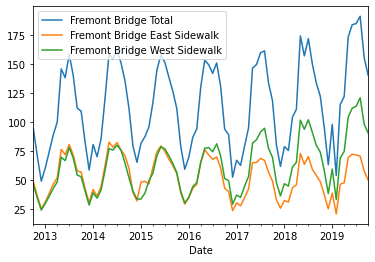

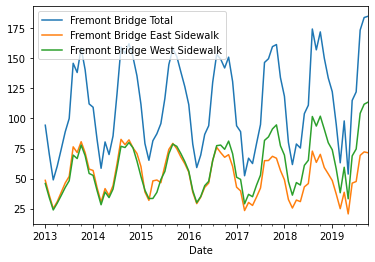

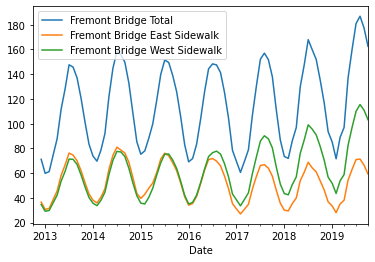

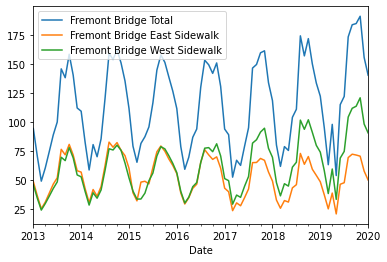

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data
df_monthly.plot()
plt.show()

# Plot the shifted data
df_shift.plot()
plt.show()

# Plot the rolling window data
df_roll.plot()
plt.show()

# Plot the time-shifted data
df_tshift.plot()
plt.show()

#b) question 3

In [4]:
path = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [7]:
#indexing
df[11:30]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
11,2003-01-17 00:00:00,7.05,20.22,28.60,901.78
12,2003-01-21 00:00:00,7.01,20.17,27.94,887.62
13,2003-01-22 00:00:00,6.94,20.04,27.58,878.36
14,2003-01-23 00:00:00,7.09,20.54,27.52,887.34
15,2003-01-24 00:00:00,6.90,19.59,26.93,861.40
16,2003-01-27 00:00:00,7.07,19.32,26.21,847.48
17,2003-01-28 00:00:00,7.29,19.18,26.90,858.54
18,2003-01-29 00:00:00,7.47,19.61,27.88,864.36
19,2003-01-30 00:00:00,7.16,18.95,27.37,844.61
20,2003-01-31 00:00:00,7.18,18.65,28.13,855.70


In [8]:
df['AAPL'][0:10]

0    7.40
1    7.45
2    7.45
3    7.43
4    7.28
5    7.34
6    7.36
7    7.32
8    7.30
9    7.22
Name: AAPL, dtype: float64

In [9]:
#selection
df["AAPL"]

0         7.40
1         7.45
2         7.45
3         7.43
4         7.28
         ...  
2209    388.81
2210    400.29
2211    402.19
2212    408.43
2213    422.00
Name: AAPL, Length: 2214, dtype: float64

In [10]:
df[["AAPL", "MSFT"]]

,AAPL,MSFT
0,7.40,21.11
1,7.45,21.14
2,7.45,21.52
3,7.43,21.93
4,7.28,21.31
...,...,...
2209,388.81,26.94
2210,400.29,27.00
2211,402.19,26.96
2212,408.43,27.18


In [11]:
df[df["AAPL"] > 10]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
128,2003-07-08 00:00:00,10.20,21.84,29.77,1007.84
135,2003-07-17 00:00:00,10.45,21.04,29.40,981.73
136,2003-07-18 00:00:00,10.43,21.20,29.97,993.32
137,2003-07-21 00:00:00,10.31,20.53,29.55,978.80
138,2003-07-22 00:00:00,10.40,20.80,29.83,988.11
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [12]:
df[df["AAPL"] > 10]["SPX"]

128     1007.84
135      981.73
136      993.32
137      978.80
138      988.11
         ...   
2209    1194.89
2210    1195.54
2211    1207.25
2212    1203.66
2213    1224.58
Name: SPX, Length: 2069, dtype: float64

In [ ]:
#subsetting

In [13]:
subset = df.iloc[[0, 1], [0, 1]]

In [14]:
subset

,Unnamed: 0,AAPL
0,2003-01-02 00:00:00,7.40
1,2003-01-03 00:00:00,7.45


In [15]:
# Date Ranges
df.min()

Unnamed: 0    2003-01-02 00:00:00
AAPL                         6.56
MSFT                        14.33
XOM                         26.21
SPX                        676.53
dtype: object

In [16]:
df.max()

Unnamed: 0    2011-10-14 00:00:00
AAPL                        422.0
MSFT                        34.07
XOM                         87.48
SPX                       1565.15
dtype: object

In [17]:
#Frequencies
df.value_counts()

Unnamed: 0           AAPL    MSFT   XOM    SPX    
2003-01-02 00:00:00  7.40    21.11  29.22  909.03     1
2008-11-13 00:00:00  96.44   19.83  70.52  911.29     1
2008-11-05 00:00:00  103.30  20.60  68.52  952.77     1
2008-11-06 00:00:00  99.10   19.48  65.05  904.88     1
2008-11-07 00:00:00  98.24   20.06  69.15  930.99     1
                                                     ..
2005-11-28 00:00:00  69.66   24.89  51.98  1257.46    1
2005-11-25 00:00:00  69.34   24.90  53.19  1268.25    1
2005-11-23 00:00:00  67.11   25.05  52.98  1265.61    1
2005-11-22 00:00:00  66.52   25.04  52.79  1261.23    1
2011-10-14 00:00:00  422.00  27.27  78.11  1224.58    1
Length: 2214, dtype: int64

In [18]:
#Shifting
temp_df = df.shift(100)
temp_df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2209,2011-05-18 00:00:00,339.87,24.54,81.20,1340.68
2210,2011-05-19 00:00:00,340.53,24.56,81.79,1343.60
2211,2011-05-20 00:00:00,335.22,24.34,81.03,1333.27
2212,2011-05-23 00:00:00,334.40,24.02,80.14,1317.37


In [19]:
temp_df = df.shift(-200)
temp_df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-10-17 00:00:00,11.38,22.94,32.51,1039.32
1,2003-10-20 00:00:00,11.61,23.27,32.48,1044.68
2,2003-10-21 00:00:00,11.59,23.27,32.25,1046.03
3,2003-10-22 00:00:00,11.38,22.90,31.41,1030.36
4,2003-10-23 00:00:00,11.49,22.92,31.62,1033.77
...,...,...,...,...,...
2209,NaN,NaN,NaN,NaN,NaN
2210,NaN,NaN,NaN,NaN,NaN
2211,NaN,NaN,NaN,NaN,NaN
2212,NaN,NaN,NaN,NaN,NaN


In [20]:
## Time Zone Localization and Conversion
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')

In [21]:
dates = df.tz_localize('US/Eastern')
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01-02 00:00:00-05:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00-05:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00-05:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00-05:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00-05:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10 00:00:00-04:00,388.81,26.94,76.28,1194.89
2011-10-11 00:00:00-04:00,400.29,27.00,76.27,1195.54
2011-10-12 00:00:00-04:00,402.19,26.96,77.16,1207.25


In [22]:
# Periods and Period Arithmetic
dates.index = pd.PeriodIndex(df.index, freq='M')
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01,7.40,21.11,29.22,909.03
2003-01,7.45,21.14,29.24,908.59
2003-01,7.45,21.52,29.96,929.01
2003-01,7.43,21.93,28.95,922.93
2003-01,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10,388.81,26.94,76.28,1194.89
2011-10,400.29,27.00,76.27,1195.54
2011-10,402.19,26.96,77.16,1207.25


In [23]:
dates.index + 2

PeriodIndex(['2003-03', '2003-03', '2003-03', '2003-03', '2003-03', '2003-03',
             '2003-03', '2003-03', '2003-03', '2003-03',
             ...
             '2011-12', '2011-12', '2011-12', '2011-12', '2011-12', '2011-12',
             '2011-12', '2011-12', '2011-12', '2011-12'],
            dtype='period[M]', name='Unnamed: 0', length=2214)

In [24]:
# Period Frequency Conversion
index = pd.PeriodIndex(dates.index, freq='M')
index = index.asfreq('Q')
index

PeriodIndex(['2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             ...
             '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4',
             '2011Q4', '2011Q4', '2011Q4', '2011Q4'],
            dtype='period[Q-DEC]', name='Unnamed: 0', length=2214)

In [25]:
# Resampling and Frequency Conversion
path = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv'
df = pd.read_csv(path)
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')
df_monthly = df['AAPL'].resample('M').mean()
df_monthly

Unnamed: 0
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

In [26]:
# Downsampling and Upsampling
df_monthly = df['AAPL'].resample('M').mean()
df_monthly

Unnamed: 0
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

In [27]:
df_daily = df['AAPL'].resample('D').interpolate()
df_daily

Unnamed: 0
2003-01-02      7.40
2003-01-03      7.45
2003-01-04      7.45
2003-01-05      7.45
2003-01-06      7.45
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Freq: D, Name: AAPL, Length: 3208, dtype: float64

In [28]:
# Moving Window Functions
df_rolling = df['XOM'].rolling(3).mean()
df_rolling

Unnamed: 0
2003-01-02          NaN
2003-01-03          NaN
2003-01-06    29.473333
2003-01-07    29.383333
2003-01-08    29.246667
                ...    
2011-10-10    74.576667
2011-10-11    75.370000
2011-10-12    76.570000
2011-10-13    76.600000
2011-10-14    77.213333
Name: XOM, Length: 2214, dtype: float64

In [29]:
# Exponentially Weighted Functions
df_ewm = df['XOM'].ewm(span=3).mean()
df_ewm

Unnamed: 0
2003-01-02    29.220000
2003-01-03    29.233333
2003-01-06    29.648571
2003-01-07    29.276000
2003-01-08    29.045806
                ...    
2011-10-10    74.913055
2011-10-11    75.591528
2011-10-12    76.375764
2011-10-13    76.372882
2011-10-14    77.241441
Name: XOM, Length: 2214, dtype: float64

In [30]:
df_ewm = df['XOM'].ewm(halflife=5).mean()
df_ewm

Unnamed: 0
2003-01-02    29.220000
2003-01-03    29.230692
2003-01-06    29.508163
2003-01-07    29.338414
2003-01-08    29.206786
                ...    
2011-10-10    73.267695
2011-10-11    73.656342
2011-10-12    74.109888
2011-10-13    74.402459
2011-10-14    74.882398
Name: XOM, Length: 2214, dtype: float64

#PART C :- classifier


#c) question 4

In [82]:
Kidney = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/assignment4/ckd.csv')
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [83]:
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [84]:
Kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [85]:
Kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [86]:
Kidney.shape

(400, 26)

In [87]:
kidney = Kidney[['hemo','bgr','classification']]

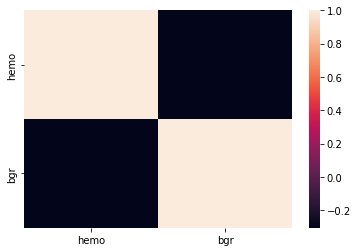

In [88]:
kcorr = kidney.corr()
sns.heatmap(kcorr)

In [89]:
#this needs to be corrected because we are supposed to have only 2 classes
kidney.classification.unique()
kidney

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


In [90]:
kidney.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [91]:
#fill the null values with the previous values
kidney.fillna(method='bfill',inplace=True)
kidney.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


hemo              0
bgr               0
classification    0
dtype: int64

In [92]:
kidney.shape

(400, 3)

In [ ]:
#now we have cleaned data
#we have to preproces this data and do the training

In [93]:
kidney.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [94]:
classification = np.array(kidney['classification'])

In [95]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [96]:
kidney['classification']=classification

<ipython-input-96-ed159955a189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=classification


In [97]:
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [99]:
lab = LabelEncoder()
mms = MinMaxScaler()

In [100]:
kidney['classification']=lab.fit_transform(kidney['classification'])

<ipython-input-100-0431b877cc44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=lab.fit_transform(kidney['classification'])


In [101]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,12.388500,147.585000,0.375000
std,2.865265,79.444928,0.484729
min,3.100000,22.000000,0.000000
25%,10.400000,99.000000,0.000000
50%,12.500000,120.000000,0.000000
75%,14.800000,163.500000,1.000000
max,17.800000,490.000000,1.000000


In [102]:
cols = kidney.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [103]:
for i in cols:
    kidney[i]=mms.fit_transform(kidney[[i]])

<ipython-input-103-a8dbd1328128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=mms.fit_transform(kidney[[i]])
<ipython-input-103-a8dbd1328128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=mms.fit_transform(kidney[[i]])
<ipython-input-103-a8dbd1328128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [104]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,0.631871,0.268344,0.375000
std,0.194916,0.169754,0.484729
min,0.000000,0.000000,0.000000
25%,0.496599,0.164530,0.000000
50%,0.639456,0.209402,0.000000
75%,0.795918,0.302350,1.000000
max,1.000000,1.000000,1.000000


In [105]:
# splitting the data for training and validation
from sklearn.model_selection import train_test_split

In [106]:
y = kidney.pop('classification')

In [107]:
X = kidney

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
#now we have train and validation sets so
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC() 

In [111]:
knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=7)

In [112]:
#now we have trained knn model

In [113]:
dtc.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [114]:
svc.fit(X=X_train,y=y_train)

SVC()

In [115]:
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)

In [116]:
#now checking the metrics like accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [117]:
#Knn
knn_acc = accuracy_score(y_test,knn_ypred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.9625


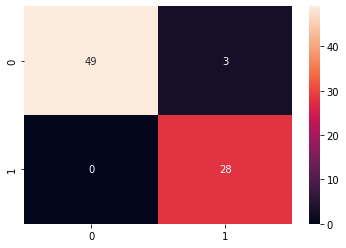

In [118]:
knn_conf = confusion_matrix(y_test,knn_ypred)
sns.heatmap(knn_conf,cbar=True,annot=True)

In [119]:
print('The confusion matrix is :')
knn_conf

The confusion matrix is :


array([[49,  3],
       [ 0, 28]])

In [120]:
# dtc
dtc_acc = accuracy_score(y_test,dtc_ypred)
print(f'Accuracy score : {dtc_acc}')

Accuracy score : 0.95


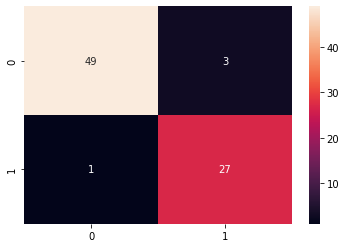

In [121]:
dtc_conf = confusion_matrix(y_test,dtc_ypred)
sns.heatmap(dtc_conf,cbar=True,annot=True)

In [122]:
print('The confusion matrix is :')
dtc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]])

In [123]:
#svc
svc_acc = accuracy_score(y_test,svc_ypred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.95


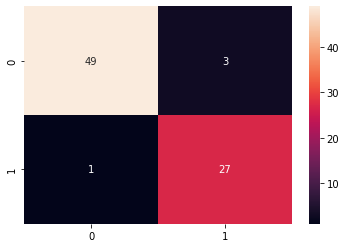

In [124]:
svc_conf = confusion_matrix(y_test,svc_ypred)
sns.heatmap(svc_conf,cbar=True,annot=True)

In [125]:
print('The confusion matrix is :')
svc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]])

In [126]:
hem = np.array(kidney['hemo'])
glu = np.array(kidney['bgr'])

In [127]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [128]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,0.631871,0.45484


In [ ]:
#now let us predict if alice has the disease or not

In [129]:
#knn
ali_knn = knn.predict(alice)
ali_dtc = dtc.predict(alice)
ali_svc = svc.predict(alice)

In [130]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in KNN : {ali_dtc}')
print(f'Prediction of disease in KNN : {ali_svc}')

Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]


From the above predictions it is clear that Alice doesnot have tha disease beacuse all the predictions are 0.
# So alice doesnot have the disease

#c) question 5

In [ ]:
#Prepare a  classifier model  for wine dataset – wine.csv.

In [167]:
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/assignment4/Wine.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [168]:
wine.shape

(178, 14)

In [169]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [170]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [171]:
cols = wine.columns
len(cols)

14

In [172]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [137]:
#We dont have any missing data so we can directly go for scaling
#we have already imported the minmax scaler above. So no need to import now

In [173]:
for i in cols[:12]:
    wine[i]= mms.fit_transform(wine[[i]])
wine['Customer_Segment']=lab.fit_transform(wine[['Customer_Segment']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,746.893258,0.938202
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,314.907474,0.775035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,278.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,500.500000,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,673.500000,1.000000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,985.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1680.000000,2.000000


In [ ]:
#we have already imported the knn, decisiontree and support vector classifier above.
#So we can proceed for splitting the data and training

In [175]:
wy = wine.pop('Customer_Segment')
wX = wine

In [176]:
wy.unique()

array([0, 1, 2])

In [177]:
X_wtrain,X_wtest,y_wtrain,y_wtest = train_test_split(wX,wy,test_size=0.3)

In [178]:
#knn
knn.fit(X_wtrain,y_wtrain)

KNeighborsClassifier(n_neighbors=7)

In [179]:
knw_pred = knn.predict(X_wtest)

In [181]:
#metrics testing
knw_acc = accuracy_score(y_wtest,knw_pred)
print(f'The accuuracy of the model is {knw_acc}')

The accuuracy of the model is 0.7222222222222222


In [182]:
w_knnmat = confusion_matrix(y_wtest,knw_pred)

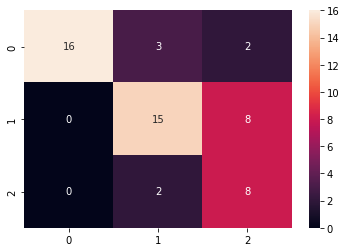

In [183]:
sns.heatmap(w_knnmat,annot=True,cbar = True)

In [184]:
print('Confusion matrix is : ')
w_knnmat

Confusion matrix is : 


array([[16,  3,  2],
       [ 0, 15,  8],
       [ 0,  2,  8]])

In [185]:
#dtc
dtc.fit(X_wtrain,y_wtrain)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [186]:
dtw_pred = dtc.predict(X_wtest)

In [187]:
#metrics
dtc_acc = accuracy_score(y_wtest,dtw_pred)
print(f'The accuuracy of the model is {dtc_acc}')

The accuuracy of the model is 0.9444444444444444


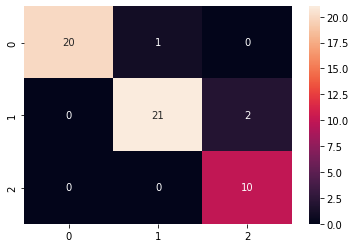

In [188]:
dtw_mat = confusion_matrix(y_wtest,dtw_pred)
sns.heatmap(dtw_mat,annot=True,cbar = True)

In [189]:
print('Confusion matrix is : ')
dtw_mat

Confusion matrix is : 


array([[20,  1,  0],
       [ 0, 21,  2],
       [ 0,  0, 10]])

In [190]:
#svc
svc.fit(X_wtrain,y_wtrain)
scw_predict = svc.predict(X_wtest)

In [191]:
scwacc = accuracy_score(y_wtest,scw_predict)
print(f'The accuuracy of the model is {scwacc}')

The accuuracy of the model is 0.7592592592592593


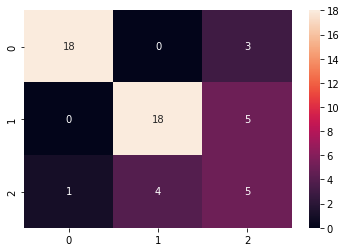

In [192]:
scw_mat = confusion_matrix(y_wtest,scw_predict)
sns.heatmap(scw_mat,annot=True,cbar = True)

In [193]:
print('Confusion matrix is : ')
scw_mat

Confusion matrix is : 


array([[18,  0,  3],
       [ 0, 18,  5],
       [ 1,  4,  5]])

PART D :-regression

#d) question 7

In [ ]:
##### Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 

In [140]:
home= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/assignment4/Housing.csv')
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [141]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [142]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [143]:
obj_colums = home.describe(include='object').columns

In [144]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [145]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
#there are no missing values so we can go to encoding
#first let us encode columns with object type data

In [146]:
for i in obj_colums:
    home[i]=lab.fit_transform(home[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
#now let us use min max scaler for scaling the data

In [148]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [149]:
for i in all_cols[1:]:
    home[i]=mms.fit_transform(home[[i]])

In [150]:
home.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.534862
std,1.870440e+06,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.380686
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.330000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
#now the data is ready for traing
yh= home.pop('price')
Xh = home

In [152]:
Xh_train,Xh_test,yh_train,yh_test = train_test_split(Xh,yh,test_size=0.2,random_state=42)

In [153]:
Xh_train.shape

(436, 12)

In [154]:
Xh_test.shape

(109, 12)

In [155]:
yh_train.shape

(436,)

In [156]:
yh_test.shape

(109,)

In [157]:
#let us import knn and multiple regressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=7)

In [158]:
#first linear regressor
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)

In [159]:
#now KNN regressor
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


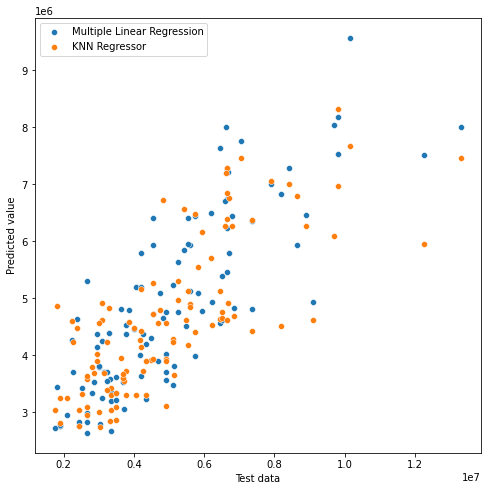

In [160]:
#plotting the results in a plot to see the relation
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


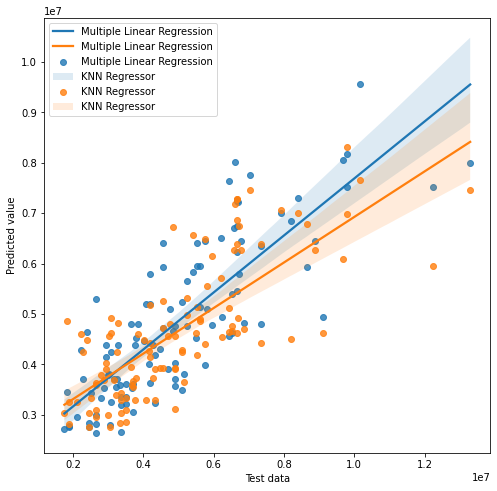

In [161]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

In [162]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [163]:
#mlr
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)

In [164]:
#knnr
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)

In [165]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,9.796797e+05,1.771751e+12,0.649475
KNN Regressor,1.089523e+06,2.402156e+12,0.524756


#### Comments : 

We can observe that MAE is better for KNN regressor but MSE and R2 score are better for Multiple Regression.

###### So in this case Multiple Regression is better

#d) question 8
Implement a logistic regression model – employ scikit-learn library functions. *italicized text*

In [58]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
lab = LabelEncoder()
mms = MinMaxScaler()

In [59]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']

In [60]:
titanic_df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [61]:
#name is definetly not needed so remove it
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
titanic_df.drop(['name','ticket','home.dest'], axis=1, inplace=True)
titanic_df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,1.0,0.0,14.4542,C,0
1305,3.0,female,NaN,1.0,0.0,14.4542,C,0
1306,3.0,male,26.5000,0.0,0.0,7.2250,C,0
1307,3.0,male,27.0000,0.0,0.0,7.2250,C,0


In [62]:
titanic_df['sex']=lab.fit_transform(titanic_df[['sex']])
titanic_df['embarked']=lab.fit_transform(titanic_df[['embarked']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
for i in titanic_df.columns[:-1]:
    titanic_df[i]=mms.fit_transform(titanic_df[[i]])

In [64]:
titanic_df.describe()

,pclass,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,0.647441,0.644003,0.372206,0.062357,0.042781,0.064988,0.498345
std,0.418918,0.478997,0.180545,0.130207,0.096173,0.101026,0.272043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.260960,0.000000,0.000000,0.015412,0.333333
50%,1.000000,1.000000,0.348643,0.000000,0.000000,0.028213,0.666667
75%,1.000000,1.000000,0.486430,0.125000,0.000000,0.061045,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
titanic_df['survived'].unique()

['1', '0']
Categories (2, object): ['0', '1']

In [66]:
titanic_df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
survived      0
dtype: int64

In [67]:
age = titanic_df['age']
ages = [i for i in age if (i>=0 and i<=1)]

In [68]:
avg_age = np.array(ages).mean()
for i in range(len(age)):
    if (age[i]>=0 and age[i]<=1):
        pass
    else:
        age[i]=avg_age

<ipython-input-68-6d57e88afded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=avg_age


In [69]:
titanic_df['age']=age

In [70]:
titanic_df.dropna(inplace=True)

In [71]:
#now we have cleaned data for training
yt= titanic_df.pop('survived')
Xt = titanic_df

In [72]:
# splitting the data for training and validation
from sklearn.model_selection import train_test_split
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.2)

In [73]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [74]:
logr.fit(Xt_train,yt_train)

LogisticRegression()

In [75]:
tita_pred = logr.predict(Xt_test)

In [77]:
#now checking the metrics like accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
log_acc=accuracy_score(yt_test,tita_pred)
print(f'Accuracy of the model is {log_acc}')

Accuracy of the model is 0.8091603053435115


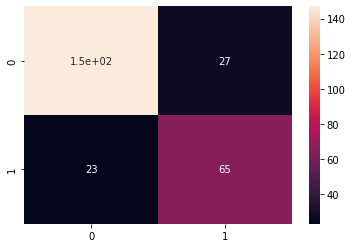

In [78]:
log_conf = confusion_matrix(yt_test,tita_pred)
sns.heatmap(log_conf,annot=True,cbar=True)

In [79]:
print('The confusion matrix is : ')
log_conf

The confusion matrix is : 


array([[147,  27],
       [ 23,  65]])

In [ ]:
#END OF ASSIGNMENT